## Hecho por: David Ramírez Betancourth
## C.C. 1002636667
## Ingeniería Electrónica
## Universidad Nacional de Colombia Sede Manizales

In [81]:
import matplotlib.pyplot as plt #Graficador
import numpy as np #Opearciones entre arrays
import scipy.signal as sig #métodos de señales (welch)


import tensorflow as tf # Red Neuronal
from sklearn.model_selection import train_test_split #Divisor de datos de entrenamiento y testeo
from sklearn.preprocessing import MinMaxScaler #Normalizador de escala
from tensorflow.keras.models import Sequential #Red Neuronal
from tensorflow.keras.layers import Dense, Dropout #Conexión neuronas
from tensorflow.keras.optimizers import Adam #Optimizador de red

nfft = N*2 -1

nperseg = N-1


#Generar Señal

$f_o = 1 Hz$

$x(t) = cos(\omega_o) - \frac{sin(3\omega_o)}{3} + \frac{cos(5\omega_o)}{5}$

$\xi(t) = x(t) + \eta(t)$

Aplicar método welch: Consiste en hallar la FFT por ventaneos de la señal y luego promediando las PSD de cada segmento

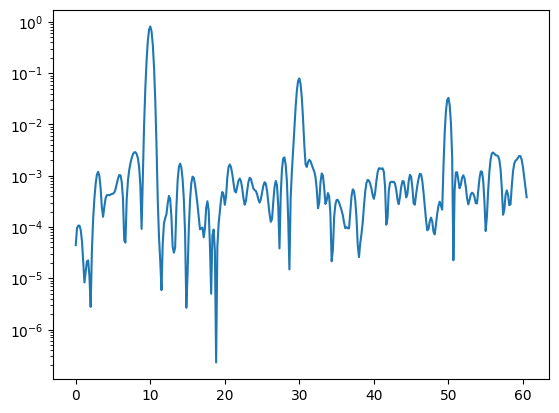

(1023,)


In [82]:

def randomvector(N, sigma):
    """Genera un vector gaussiano eta = N(0, sigma)"""

    return np.random.normal(0, np.sqrt(sigma), size=N) 

def real_signal(t, wo):
    """x(t)"""

    return np.cos(wo*t) - (1/3)*np.sin(3*wo*t) + (1/5)*np.cos(5*wo*t)


def welch_vector(X, fs, nperseg, N):
    """Generar psd de la señal xi
       ventaneo hamming
       overlap del 50% de la vetana
    """
    nperseg = N - 1 
    nfft = nperseg*2 - 1

    return sig.welch(X, fs, window='blackmanharris', nperseg=nperseg,nfft=nfft, noverlap=N//2)

N = 1024 #Longitud señal
M = 2000 # No de señales
fo = 10 # 10Hz frecuencia
wo = 2*np.pi*fo
sigma = 0.1  #varianza
nperseg = N - 1 #Longitud ventana

t = np.linspace(0, 3, N) # vector de tiempo de 0 a 3 segundos
fs = 1/(t[1]-t[0]) #Muestreo

nfft = nperseg*2 - 1


X = real_signal(t, wo) + randomvector(N, sigma)
f,psd =welch_vector(X, fs, nperseg, N)

#plt.plot(t, X)
fn = int(5*wo+50)
plt.semilogy(f[0:fn], psd[0:fn])
plt.show()

print(psd.shape)


In [84]:
np.random.seed(0)

def randomvector(N, sigma):
    """Genera un vector gaussiano eta = N(0, sigma)"""

    return np.random.normal(0, np.sqrt(sigma), size=N) 

def real_signal(t, wo):
    """x(t)"""

    return np.cos(wo*t) - (1/3)*np.sin(3*wo*t) + (1/5)*np.cos(5*wo*t)


def welch_vector(X, fs, nperseg, N):
    """Generar psd de la señal xi
       ventaneo hamming
       overlap del 50% de la vetana
    """
    nperseg = N - 1 
    nfft = nperseg*2 - 1

    return sig.welch(X, fs, window='blackmanharris', nperseg=nperseg,nfft=nfft, noverlap=N//2)

N = 1024 #Longitud señal
M = 2000 # No de señales
fo = 1 # 1Hz frecuencia
wo = 2*np.pi*fo
sigma = 0.1  #varianza
nperseg = N #Longitud ventana

t = np.linspace(0, 3, N) # vector de tiempo de 0 a 3 segundos
fs = 1/(t[1]-t[0]) #Muestreo

X = np.zeros((M, N)) #Matriz vacía de zeros
for i in range(M):
    X_true = real_signal(t, wo) #Generar señal real
    X[i] = X_true + randomvector(N, sigma) #Combinarla con ruido, meterla a la fila

Psd = np.zeros((M,N)) # Matriz welch, M señales, longitud psd = (ventaneo//2) +1

for i in range(M):
    f, psd = welch_vector(X[i], fs, nperseg, N)
    Psd[i] = psd

psd_mean = np.mean(Psd, axis=0)

Psd_mean_m = np.zeros((M, (nperseg//2)+1))
for i in range(M):
    Psd_mean_m[i] = psd_mean


ValueError: could not broadcast input array from shape (1023,) into shape (1024,)

# Preparar Datos

Scaler: normaliza los datos a una escala deseada (0,1)

train test split: Divide los datos un porcentaje deseado 70/30, 70 entrenar, 30 test.

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))

X = scaler.fit_transform(X)
Psd_mean_m = scaler.fit_transform(Psd_mean_m)



# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, Psd_mean_m, test_size=0.3, random_state=42)

# Red Neuronal

Modelo tipo Sequential(MLP): Las capas se apilan una tras otra, lo que hace que el flujo de datos sea simple y directo. Es MLP porque contiene perceptrones. Capa de entrada - capa oculta - capa de salida. Configuración Dense.

Optimizador Adam: Utiliza AdaGrad y RMSProp. Consiste en:
- Calcular Gradiente
- Se corrige sesgos
- Se actualizan pesos
 



In [ ]:
model = Sequential([
    tf.keras.Input(shape=(N,)), #Capa de entrada
    Dense(N//2, activation='relu'), #Capa oculta
    Dropout(0.5), #Dropout para no sobreajuste
    Dense(N//4, activation='relu'), # Capa oculta
    Dense(N//6, activation='relu'), #Capa oculta
    Dense(nperseg//2 + 1) #Capa de salida
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=['accuracy']) #Optimizador adam, 

history = model.fit(X_train, y_train, epochs=25, validation_split=0.2)

Epoch 1/25
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 7.6024e-04 - loss: 0.0201 - val_accuracy: 0.0000e+00 - val_loss: 1.4508e-04
Epoch 2/25
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: 6.9046e-04 - val_accuracy: 0.0000e+00 - val_loss: 4.3802e-05
Epoch 3/25
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 2.3056e-04 - val_accuracy: 0.0000e+00 - val_loss: 2.6931e-05
Epoch 4/25
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0012 - loss: 1.1831e-04 - val_accuracy: 0.0000e+00 - val_loss: 1.8339e-05
Epoch 5/25
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0023 - loss: 6.8949e-05 - val_accuracy: 0.0000e+00 - val_loss: 1.3218e-05
Epoch 6/25
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: 4.0074e-05 - val_accuracy: 0.0000e+00 - val_loss: 9.7656e-06
Epoch 7/25
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 2.5795e-05 - val_accuracy: 0.0000e+00 - val_loss: 7.4888e-06
Epoch 8/25
35/

# Rendimiento del Modelo

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 2.4343e-07 
Test Loss: 2.5474884068898973e-07, Test MAE: 0.0


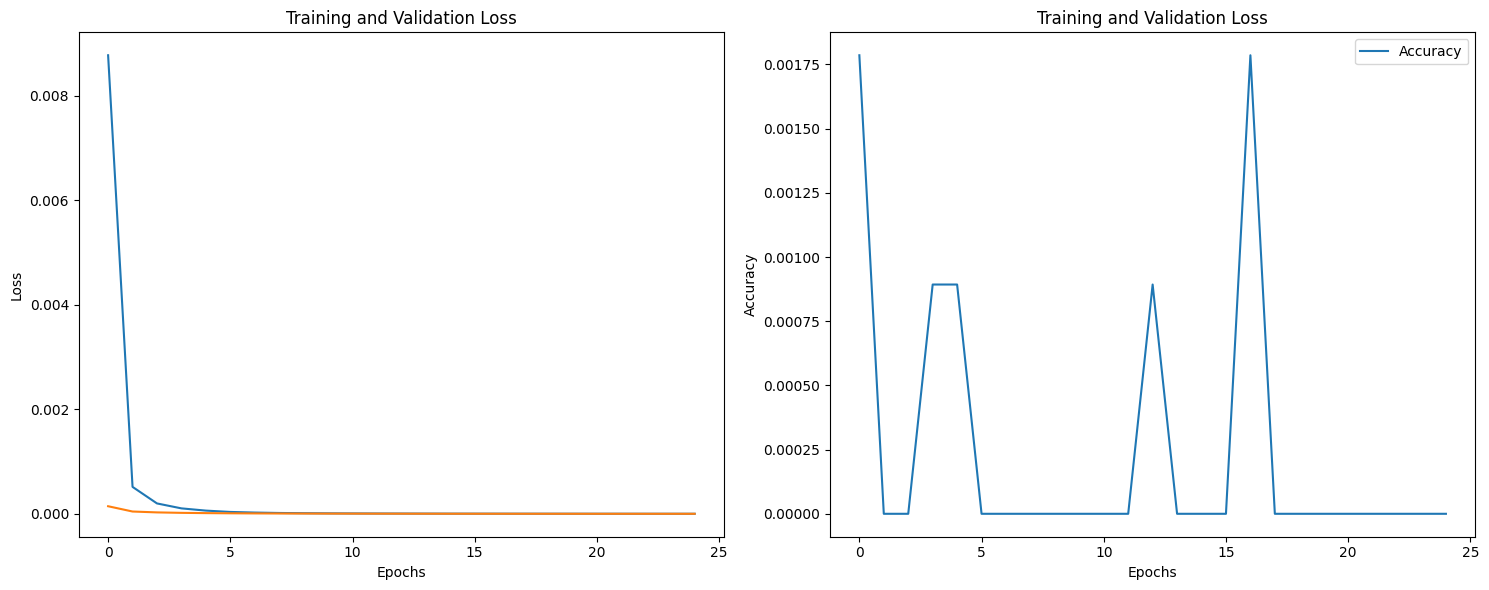

In [ ]:
# Evaluar modelo
loss, mae = model.evaluate(X_test, y_test) #Saca mae = promedio del error absoluto y pérdidas del modelo
print(f"Test Loss: {loss}, Test MAE: {mae}")


fig, axs = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(15, 6)
axs[0].plot(history.history['loss'], label='Training Loss')
axs[0].plot(history.history['val_loss'], label='Validation Loss')
axs[0].set_title('Training and Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[1].plot(history.history['accuracy'], label='Accuracy')
axs[1].set_title('Training and Validation Loss')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# Predecir

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


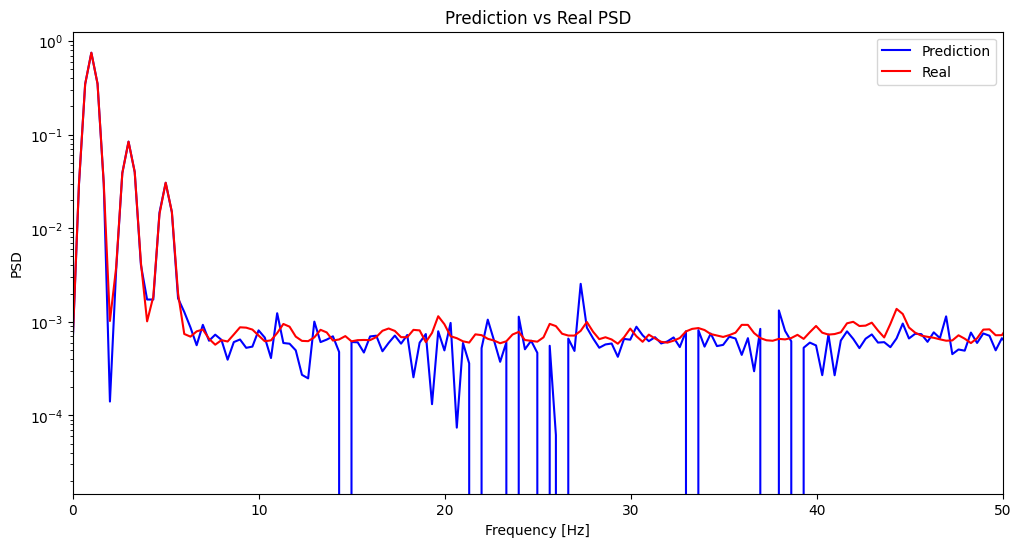

In [ ]:
psd_pred = model.predict(X_test)
psd_pred = scaler.inverse_transform(psd_pred)

psd_real = np.zeros((M, (nperseg//2)+1))
for i in range(X_test.shape[0]):
    f, psd = welch_vector(X_test[i], fs, nperseg)
    psd_real[i] = psd
psd_real = scaler.inverse_transform(psd_real)

plt.figure(figsize=(12, 6))
plt.semilogy(f, psd_pred[50], color='b', label='Prediction')
plt.semilogy(f, psd_real[50], color='r', label='Real')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD')
plt.title('Prediction vs Real PSD')
plt.legend()
plt.xlim([0,50])
plt.show()

In [ ]:
np.random.seed(0)

def reconstruir_senal(f, psd, t):

    # Convertir la PSD en la magnitud del espectro de frecuencia
    magnitud = np.sqrt(psd)

    # Crear un espectro complejo con magnitud y fase aleatoria
    
    fase_aleatoria = np.exp(1j * np.random.uniform(0, 2 * np.pi, len(f)))
    espectro = magnitud * fase_aleatoria

    # Duplicar el espectro para considerar las frecuencias negativas
    espectro_completo = np.concatenate([espectro, np.conj(espectro[::-1])])

    # Realizar la IFFT para obtener la señal en el dominio temporal
    senal = np.fft.ifft(espectro_completo)

    # Asegurar que la señal resultante sea real
    senal_real = np.real(senal)

    return senal_real[:len(t)]

rec_real = reconstruir_senal(f, Psd_real[100], t)
rec_pred = reconstruir_senal(f,psd_pred[100], t)
t_rec = t[0:502]


plt.figure(figsize=(12,6))
plt.plot(t_rec, rec_real, label='real')
plt.plot(t_rec, rec_pred, label='pred')
plt.legend()
plt.show()

NameError: name 'Psd_real' is not defined